In [1]:
print("Hello team")

Hello team


# 1. Title, Name and References

Include a title of your regression project. Include your name and student ID. Add information about
any references you used to help complete the project

#### Team member
1. Ngoc Chau Tran - 300307368
2. Leozítor Floro de Souza - 300334919
3. Carolina Henrique de Melo Louback - 300306289
4. 

#### Reference


# 2. Library import and data loading

In [2]:
!pip install --upgrade scikit-learn pandas numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
%matplotlib inline

Requirement already up-to-date: scikit-learn in c:\users\takil\anaconda3\lib\site-packages (0.24.1)
Requirement already up-to-date: pandas in c:\users\takil\anaconda3\lib\site-packages (1.2.1)
Requirement already up-to-date: numpy in c:\users\takil\anaconda3\lib\site-packages (1.20.1)


In [3]:

path="unclean_data.csv"

unclean_data = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

# Visualize dataset head apri
unclean_data

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [4]:
#Get shape
unclean_data.shape

(4006, 11)

In [5]:
#get column data value types
unclean_data.dtypes

model            object
year            float64
price            object
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

In [6]:
#Check for nan values in the dataset
unclean_data.isnull().values.any()

True

In [7]:
unclean_data.isna()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,False,False,False,False,True,False,False,False,True,True,False
1,False,False,False,False,True,False,False,False,True,True,False
2,False,False,False,False,True,False,False,False,True,True,False
3,False,False,False,False,True,False,False,False,True,True,False
4,False,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4001,False,False,False,False,False,False,False,False,False,False,False
4002,False,False,False,False,False,False,False,False,False,False,False
4003,False,False,False,False,False,False,False,False,False,False,False
4004,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Count how many nans in dataset columns
unclean_data.isna().sum()

model             99
year             102
price             99
transmission      99
mileage          198
fuel type       2677
engine size      164
mileage2         116
fuel type2       198
engine size2     198
reference         99
dtype: int64

In [9]:
#Check categorical variables (transmission, fuel type)
#transmission
unclean_data['transmission'].value_counts()

Semi-Auto    2071
Automatic    1636
Manual        199
Other           1
Name: transmission, dtype: int64

In [10]:
#fuel type
unclean_data['fuel type'].value_counts()

31        310
32        240
38        174
37        101
Diesel     83
30         76
25         65
29         57
33         50
34         29
26         25
39         17
36         17
43         13
Petrol     13
27         12
35         12
40          8
44          6
46          4
24          4
Hybrid      3
45          3
47          3
28          3
48          1
Name: fuel type, dtype: int64

# 3. Data Analysis, Preparation and Wrangling

### Professor Project Directions
Before you start, please take a look at the original csv file to find out about the data. Then, explore the dataset in your Jupyter notebook. Have a peek of the data. You should notice that the dataset is not clean. The followings are the issues that appear in the dataset:

1. [ ] There are missing rows (rows that have all NaN)
2. [ ] There are missing values in some columns
3. [ ] There are fields that use a wrong datatype, i.e., year is in float64 instead of int64. Hint: You can
use df.dtypes to look at the datatypes of each columns
4. [ ] There are columns that have mixed values, i.e., string and numbers
5. [ ] There is a column with currency symbol
6. [ ] Some numerical values are displayed with comma format
7. [ ] Some columns are using different standard values, i.e., engine size and engine size2
8. [ ] Some columns do not have valid names
9. [ ] There is a column with categorical data, i.e., transmission and fuel type
10. [ ] There are some unneeded columns

### Step 3.1 - Handling missing values

In [11]:
#Drop rolls where all values are NaN values
clean_df = unclean_data.dropna(how='all')
#Reset index
clean_df1 = clean_df.reset_index(drop=True)

In [12]:
#Check how many  NaN values still exists and check data shape
clean_df1.isnull().values.any()

True

In [13]:
clean_df1.isna().sum()

model              0
year               3
price              0
transmission       0
mileage           99
fuel type       2578
engine size       65
mileage2          17
fuel type2        99
engine size2      99
reference          0
dtype: int64

In [14]:
clean_df1.shape #number of rows reduced from 4006 to 3907

(3907, 11)

In [15]:
clean_df1.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


### Step 3.2 - Handling the currency symbols and comma format

In [16]:
#Replace currency symbols with empt space at price column
clean_df1['price'] = clean_df1['price'].str.replace('£','')

In [17]:
clean_df1.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [18]:
#Replace comma character with empt space at price column
clean_df1['price'] = clean_df1['price'].str.replace(',','')
clean_df1.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [19]:
clean_df1.isna().sum()

model              0
year               3
price              0
transmission       0
mileage           99
fuel type       2578
engine size       65
mileage2          17
fuel type2        99
engine size2      99
reference          0
dtype: int64

In [20]:
clean_df1.dtypes

model            object
year            float64
price            object
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

In [21]:
#Change data type of price into numeric using pd.to_numeric()
clean_df1['price'] = pd.to_numeric(clean_df1['price'])

In [22]:
clean_df1.dtypes

model            object
year            float64
price             int64
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

### Step 3.3 - Handling non-valid column names

In [23]:
#Replace “fuel type”, “fuel type2”, “engine size”, and “engine size2” columns names for 
# “fuel_type”, “fuel_type2”, “engine_size” and “engine_size2” respectively.
clean_df1.rename(columns={'fuel type':'fuel_type',
                          'fuel type2':'fuel_type2',
                          'engine size':'engine_size',
                          'engine size2':'engine_size2'}, 
                 inplace=True)
clean_df1.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


### Step 3.4 - Handling missing values in columns: fuel_type

In [24]:
#Check for missing values in fuel type columns
clean_df1.isna().sum()

model              0
year               3
price              0
transmission       0
mileage           99
fuel_type       2578
engine_size       65
mileage2          17
fuel_type2        99
engine_size2      99
reference          0
dtype: int64

In [25]:
#fill nan values in column fuel_types2 with values from column fuel_type
clean_df1['fuel_type2'] = clean_df1.fuel_type2.fillna(clean_df1.fuel_type)
clean_df1.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",Diesel,NaN,/ad/24913660


In [26]:
clean_df1.isna().sum()

model              0
year               3
price              0
transmission       0
mileage           99
fuel_type       2578
engine_size       65
mileage2          17
fuel_type2         0
engine_size2      99
reference          0
dtype: int64

In [27]:
#since fuel_type still has a lot of missing values, we can drop this column
clean_df2 = clean_df1.drop(columns=['fuel_type'],axis=1)
clean_df2.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660


In [28]:
clean_df2.shape

(3907, 10)

In [29]:
clean_df2.isna().sum()

model            0
year             3
price            0
transmission     0
mileage         99
engine_size     65
mileage2        17
fuel_type2       0
engine_size2    99
reference        0
dtype: int64

In [30]:
#Rename fuel_type2 column
clean_df2.rename(columns={'fuel_type2':'fuel_type'},inplace=True)

### Step 3.5 - Handling missing values and comma format in columns: mileage

In [31]:
#fill nan values in column mileage with values from column mileage2
clean_df2['mileage'] = clean_df2.mileage.fillna(clean_df2.mileage2)
clean_df2.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,"1,200",2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,"1,000",1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,"5,000",2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,"4,500",2,"4,500",Diesel,NaN,/ad/24913660


In [32]:
clean_df2.isna().sum()

model            0
year             3
price            0
transmission     0
mileage          0
engine_size     65
mileage2        17
fuel_type        0
engine_size2    99
reference        0
dtype: int64

In [33]:
#Replace comma character with empt space at mileage column
clean_df2['mileage'] = clean_df2['mileage'].str.replace(',','')
clean_df2.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500,2,"4,500",Diesel,NaN,/ad/24913660


In [34]:
# drop the mileage2 column
clean_df3 = clean_df2.drop(columns=['mileage2'],axis=1)
clean_df3.head()

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200,2,Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000,1.5,Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000,2,Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500,2,Diesel,NaN,/ad/24913660


In [35]:
clean_df3.shape

(3907, 9)

In [36]:
# check existing NaN values in the dataset
clean_df3.isna().sum()

model            0
year             3
price            0
transmission     0
mileage          0
engine_size     65
fuel_type        0
engine_size2    99
reference        0
dtype: int64

In [37]:
#Convert mileage data type to numerical
clean_df3['mileage'] = pd.to_numeric(clean_df3['mileage'],errors='coerce')


# use a lambda function to standardize its numeric value
#clean_df3['mileage'] = clean_df3['mileage'].apply(lambda x: round(x/1000, 1) if x > 1000 else round(x, 1))

In [38]:
clean_df3.dtypes

model            object
year            float64
price             int64
transmission     object
mileage         float64
engine_size      object
fuel_type        object
engine_size2     object
reference        object
dtype: object

###Step 3.6 - Handling missing values and different value standard in columns: engine_size 

In [39]:
#fill the missing values in engine_size2 with values from the engine_size column
clean_df3['engine_size2']=clean_df3['engine_size2'].fillna(clean_df3.engine_size)
clean_df3.head()

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,2,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,2,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,2,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,2,/ad/24913660


In [40]:
# check existing NaN values in the dataset
clean_df3.isna().sum()

model            0
year             3
price            0
transmission     0
mileage          4
engine_size     65
fuel_type        0
engine_size2     0
reference        0
dtype: int64

I dont know where those null values in the mileage column come from.. but I guess this is the problem, I am just going to drop them afterward since is just 4 roles and shouldnt be very significant for the analysis overall.

In [41]:
#convert engine_size2 into numeric
clean_df3['engine_size2']=pd.to_numeric(clean_df3['engine_size2'],errors='coerce')
clean_df3['engine_size2'] = clean_df3['engine_size2'].apply(lambda x: round(x/1000, 1) if x > 1000 else round(x, 1))


In [42]:
clean_df3.head()


,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,2.0,/ad/24913660


In [43]:
#drop column engine_size.
clean_df4= clean_df3.drop(columns=['engine_size'],axis=1)
clean_df4.shape

(3907, 8)

In [44]:
#rename columns
clean_df4.rename(columns={'engine_size2':'engine_size'},inplace=True)
clean_df4.shape


(3907, 8)

###Step 3.7 - Handling wrong data type: year 

In [45]:
clean_df4.dtypes

model            object
year            float64
price             int64
transmission     object
mileage         float64
fuel_type        object
engine_size     float64
reference        object
dtype: object

In [46]:
# check existing NaN values in the dataset
clean_df4.isna().sum()

model           0
year            3
price           0
transmission    0
mileage         4
fuel_type       0
engine_size     2
reference       0
dtype: int64

In [47]:
# remove NaN values in the dataset
clean_df5 = clean_df4.dropna()

In [48]:
# check existing NaN values in the dataset
clean_df5.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuel_type       0
engine_size     0
reference       0
dtype: int64

In [49]:
# change the data type of the year column into integer format
clean_df5['year'].astype('int64')
clean_df5.shape

(3898, 8)

In [50]:
clean_df5.dtypes # show data type

model            object
year            float64
price             int64
transmission     object
mileage         float64
fuel_type        object
engine_size     float64
reference        object
dtype: object

###Step 3.8 - Handling unneeded columns 




In [51]:
clean_df5 = clean_df5.drop(columns=['model', 'reference'])
clean_df5.shape


(3898, 6)

### Step 3.9 - Handling categorical data 

In [52]:
# change categorial data of transmission into dummy values
transmission = pd.get_dummies(clean_df5['transmission']) # to get the dummy values and store in a variable called transmission
clean_df5 = clean_df5.join(transmission) # add the dummy values to new columns
clean_df5.head()


,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,Other,Semi-Auto
0,2020.0,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0
1,2020.0,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0
2,2020.0,37899,Automatic,500.0,Diesel,2.0,1,0,0,0
3,2019.0,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0
4,2019.0,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0


In [53]:
# rename the column name of 'Other' (a dummy value of transmission column) into 'OtherTransmission' since fuel_type column has a dummy value named 'Other' too
clean_df5.rename(columns={'Other' : 'OtherTransmission'}, inplace=True)
clean_df5.head(30)

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto
0,2020.0,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0
1,2020.0,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0
2,2020.0,37899,Automatic,500.0,Diesel,2.0,1,0,0,0
3,2019.0,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0
4,2019.0,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0
5,2020.0,30999,Automatic,1000.0,Diesel,2.0,1,0,0,0
6,2020.0,35999,Automatic,500.0,Diesel,2.0,1,0,0,0
7,2019.0,37990,Automatic,1412.0,Petrol,3.0,1,0,0,0
8,2019.0,28990,Automatic,3569.0,Diesel,2.0,1,0,0,0
9,2019.0,28990,Automatic,3635.0,Diesel,2.0,1,0,0,0


In [54]:
clean_df5.isna().sum()

year                 0
price                0
transmission         0
mileage              0
fuel_type            0
engine_size          0
Automatic            0
Manual               0
OtherTransmission    0
Semi-Auto            0
dtype: int64

In [55]:
# Process categories data for fuel type
fuel_type = pd.get_dummies(clean_df5['fuel_type'])
clean_df5 = clean_df5.join(fuel_type)
clean_df5.head()

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,Other,Petrol
0,2020.0,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020.0,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020.0,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019.0,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019.0,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0


In [56]:
# rename the new column name of 'Other' into 'OtherFuel' 
clean_df5.rename(columns={'Other' : 'OtherFuel'}, inplace=True)
clean_df5.head(30)

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020.0,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020.0,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020.0,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019.0,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019.0,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0
5,2020.0,30999,Automatic,1000.0,Diesel,2.0,1,0,0,0,1,0,0,0
6,2020.0,35999,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
7,2019.0,37990,Automatic,1412.0,Petrol,3.0,1,0,0,0,0,0,0,1
8,2019.0,28990,Automatic,3569.0,Diesel,2.0,1,0,0,0,1,0,0,0
9,2019.0,28990,Automatic,3635.0,Diesel,2.0,1,0,0,0,1,0,0,0


In [57]:
clean_df5.head()

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020.0,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020.0,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020.0,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019.0,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019.0,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0


In [58]:
print("Clean dataset with {} data points {} variable each.".format(*clean_df5.shape))

Clean dataset with 3898 data points 14 variable each.


In [59]:
clean_df5.dtypes

year                 float64
price                  int64
transmission          object
mileage              float64
fuel_type             object
engine_size          float64
Automatic              uint8
Manual                 uint8
OtherTransmission      uint8
Semi-Auto              uint8
Diesel                 uint8
Hybrid                 uint8
OtherFuel              uint8
Petrol                 uint8
dtype: object

Step 3.10 - Saving the cleaned data into csv

In [60]:

clean_df5.to_csv('cleaned_data_Group2.csv', index=False)

# 4. Exploratory Data Analysis and Visualization

In [61]:
#Observe the clean dataset statistics
clean_df5.describe()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Relationship between mileage and the price?

Text(0.5, 1.0, 'Price vs Mileage count')

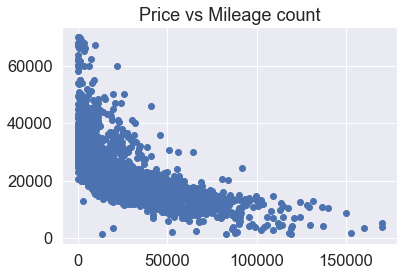

In [92]:
#Is there any relationship between the average price of used cars and the mileage count? 
plt.scatter(clean_df5.mileage, clean_df5.price)
plt.title('Price vs Mileage count')

In [ ]:
As illustrated, the higher mileage, the lower price car may cost. There is one data point that price over 80000, we will remove it from dataset.

Text(0, 0.5, 'Price')

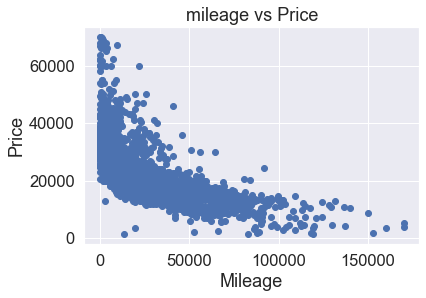

In [91]:
clean_df5.drop(clean_df5.loc[clean_df5["price"]>80000].index, inplace=True) 
plt.scatter(clean_df5.mileage, clean_df5.price)
plt.title("mileage vs Price")
plt.xlabel('Mileage')
plt.ylabel('Price')
#plt.savefig('mileage vs price.png', dpi=400, bbox_inches='tight')

#### Relationship between year and the price?

Text(0.5, 1.0, 'Price vs Year')

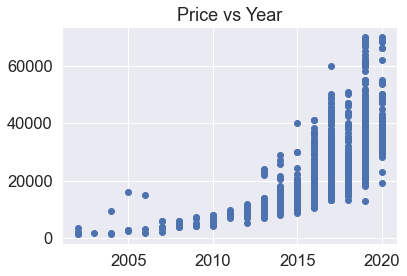

In [93]:
#Is there any relationship between the average price of used cars and the year it was manufactured?
plt.scatter(clean_df5.year, clean_df5.price)
plt.title('Price vs Year')


As we can see though illustration, price affected by the fetures year significantly

#### Relationship between engine size and the price?

Text(0.5, 1.0, 'Price vs Engine Size')

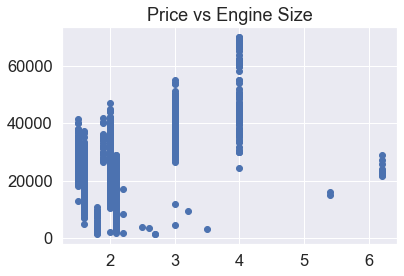

In [94]:
#Is there any relationship between the average price of used cars and the engine size?
plt.scatter(clean_df5.engine_size, clean_df5.price)
plt.title('Price vs Engine Size')

Similar to mileague, we can see there is outlier beyond point 5, we remove it from dataset

In [96]:
clean_df5.drop(clean_df5.loc[clean_df5["engine_size"]>5].index,inplace=True)

Text(0.5, 1.0, 'Price vs Engine Size')

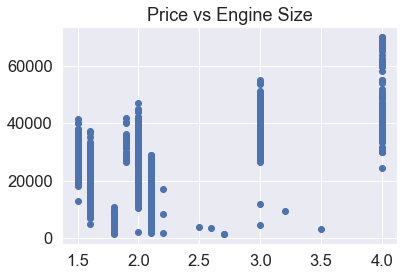

In [97]:
#relationship after dropping
plt.scatter(clean_df5.engine_size, clean_df5.price)
plt.title('Price vs Engine Size')

#### Relationship between fuel type  and the price?

Text(0.5, 1.0, 'Price vs Fuel Type')

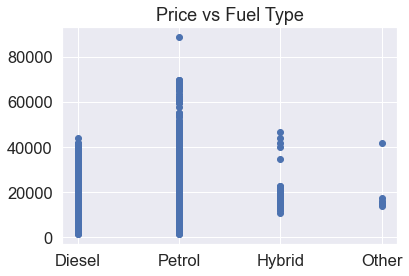

In [90]:
#Is there any relationship between the average price of used cars and the fuel type?
plt.scatter(clean_df5.fuel_type, clean_df5.price)
plt.title('Price vs Fuel Type')

In [ ]:
As illustated, transmission and fuel type are not really affected the price, so we dont put it here

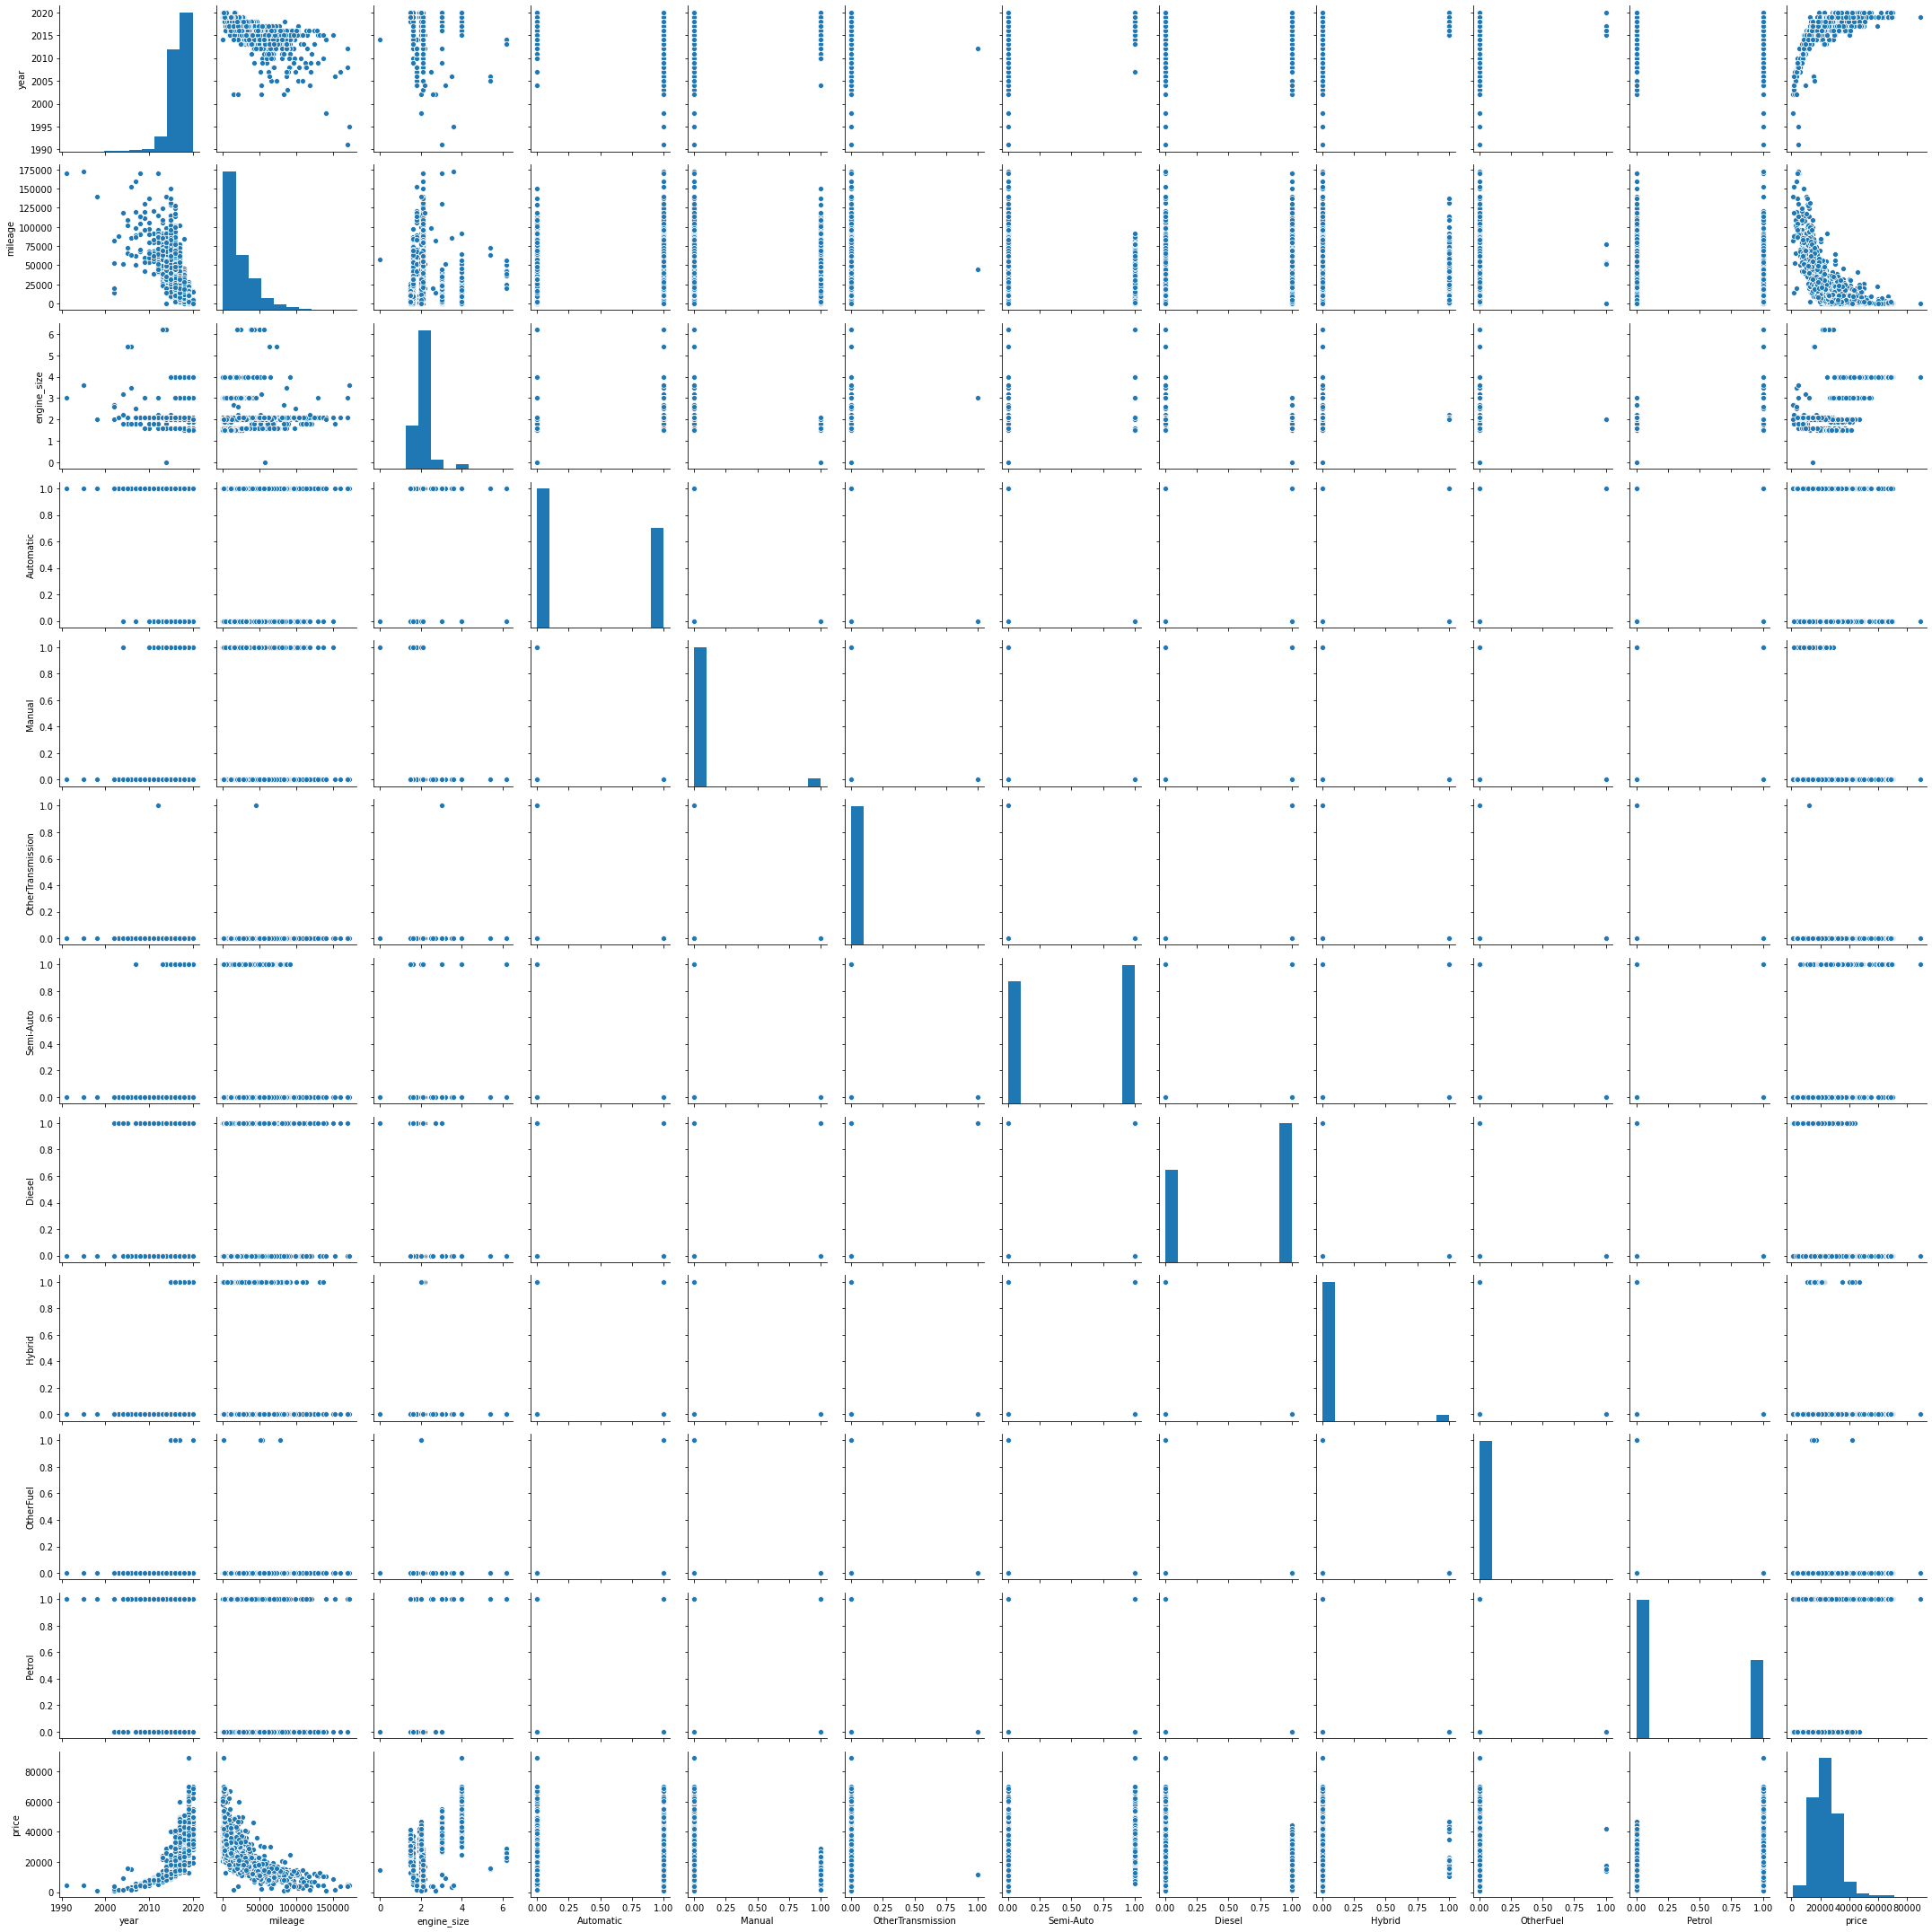

In [65]:
sns.pairplot(clean_df5[['year', 'mileage', 'engine_size', 'Automatic', 'Manual', 'OtherTransmission',
        'Semi-Auto', 'Diesel', 'Hybrid', 'OtherFuel', 'Petrol','price']], height=2.5)
plt.tight_layout()

In [66]:
#Correlations
clean_df5.corr()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
year,1.000000,0.674218,-0.774710,-0.167651,-0.201754,-0.165483,-0.038814,0.273608,-0.133324,-0.096244,-0.009054,0.175537
price,0.674218,1.000000,-0.679101,0.373003,-0.098206,-0.241093,-0.020905,0.204057,-0.254683,-0.112066,-0.016542,0.306394
mileage,-0.774710,-0.679101,1.000000,0.100712,0.183310,0.220012,0.015795,-0.278694,0.176884,0.189994,0.045100,-0.260644
engine_size,-0.167651,0.373003,0.100712,1.000000,0.077083,-0.049730,0.031628,-0.055254,-0.033476,-0.002047,-0.002959,0.035237
Automatic,-0.201754,-0.098206,0.183310,0.077083,1.000000,-0.196322,-0.013559,-0.901168,0.022000,0.088895,0.046388,-0.061991
Manual,-0.165483,-0.241093,0.220012,-0.049730,-0.196322,1.000000,-0.003716,-0.246948,0.029954,-0.046562,-0.009107,-0.011111
OtherTransmission,-0.038814,-0.020905,0.015795,0.031628,-0.013559,-0.003716,1.000000,-0.017055,0.013078,-0.003216,-0.000629,-0.012006
Semi-Auto,0.273608,0.204057,-0.278694,-0.055254,-0.901168,-0.246948,-0.017055,1.000000,-0.035372,-0.067205,-0.041803,0.066545
Diesel,-0.133324,-0.254683,0.176884,-0.033476,0.022000,0.029954,0.013078,-0.035372,1.000000,-0.245889,-0.048093,-0.918002
Hybrid,-0.096244,-0.112066,0.189994,-0.002047,0.088895,-0.046562,-0.003216,-0.067205,-0.245889,1.000000,-0.007882,-0.150452


In [67]:
#Select only numericalvariables to visualize heatmap
num_var = clean_df5[['year', 'mileage', 'engine_size','price']]

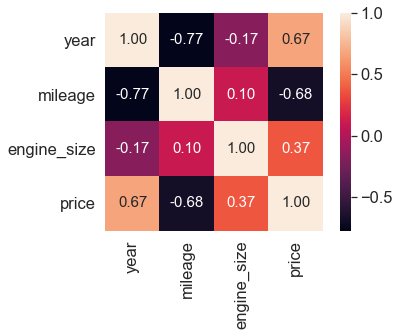

In [68]:
#Correlations heatmap
cm = np.corrcoef(num_var.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
               cbar=True,
               annot=True,
               square=True,
               fmt='.2f',
               annot_kws={'size':15},
               yticklabels=num_var.columns,
               xticklabels=num_var.columns)

# 5. Feature Observation and Hypothesis

In [69]:
#Observe the clean dataset statistics
clean_df5.describe()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature observation
1. As we can observe here, engize_size after cleaning has value minimum of 0, it's quite illogical as no car may have. Hence, it should be cleaned.
2. there are some outliers with the year as the minimum year is 1991, while the 1st quartile of year is 2016, median is 2018, 3rd IQR is 2019, so we will drop these outliers

Text(0.5, 1.0, 'Price vs Year')

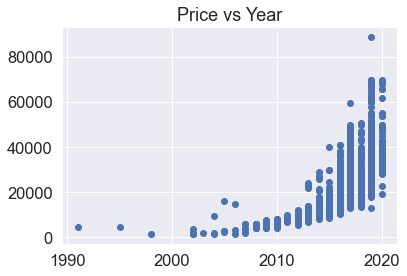

In [70]:
#Is there any relationship between the average price of used cars and the year it was manufactured?
plt.scatter(clean_df5.year, clean_df5.price)
plt.title('Price vs Year')
#=> drop outlier for the year before 2000

In [71]:
# drop rows that has 0 value in engine_size column
clean_df5.drop(clean_df5.loc[clean_df5["engine_size"]==0].index, inplace=True)


In [72]:
## drop rows which have value in year columns less than 2000, drop the ouliers
clean_df5.drop(clean_df5.loc[clean_df5["year"]<2000].index, inplace=True)
clean_df5

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020.0,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020.0,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020.0,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019.0,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019.0,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2017.0,14700,Manual,31357.0,Diesel,1.6,0,1,0,0,1,0,0,0
3903,2018.0,18500,Automatic,28248.0,Diesel,2.1,1,0,0,0,1,0,0,0
3904,2014.0,11900,Manual,48055.0,Diesel,2.1,0,1,0,0,1,0,0,0
3905,2014.0,11300,Automatic,49865.0,Diesel,2.1,1,0,0,0,1,0,0,0


In [73]:
clean_df5.describe()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000
mean,2017.360041,23697.562917,22257.408064,2.036646,0.417052,0.050847,0.000257,0.531844,0.600411,0.038778,0.001541,0.359271
std,2.112020,8940.736569,22259.808223,0.486198,0.493135,0.219714,0.016025,0.499049,0.489877,0.193089,0.039228,0.479848
min,2002.000000,1295.000000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17699.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22985.000000,14629.500000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32390.750000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,170000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


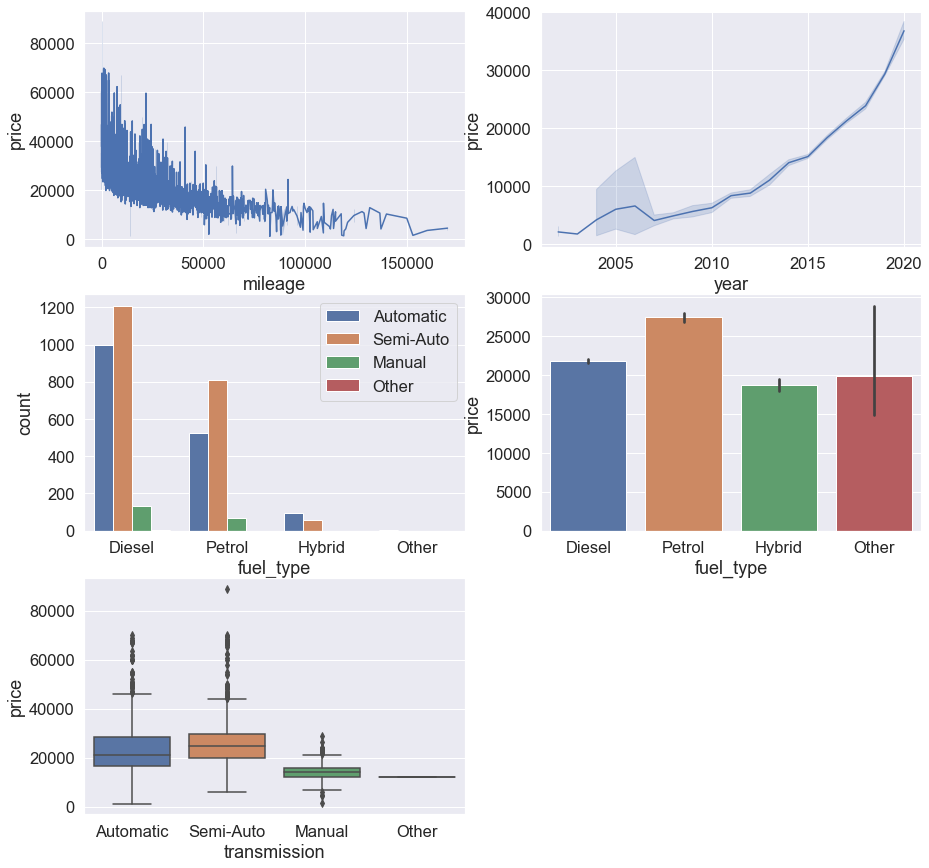

In [85]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=[15,20])
plt.subplot(421)
sns.lineplot(x='mileage',y='price',data=clean_df5)

plt.subplot(422)
sns.lineplot(x='year',y='price',data=clean_df5)

plt.subplot(423)
sns.countplot('fuel_type',hue='transmission',data=clean_df5)
plt.legend(loc='upper right')

plt.subplot(424)
sns.barplot(x='fuel_type',y='price',data=clean_df5)

plt.subplot(425)
sns.boxplot(x='transmission',y='price',data=clean_df5)

From the data visualization, we can make some predictions based on those features:
1. The higher mileague, the lower price for the car. It's reasonable that car that has been used for longer time, will have more mileague and it's cheaper.
2.Car price increasing days by days
3.Price depends on tramission type and fuel type


# 6. Training Models

### Useful Functions

In [74]:
def plot_pred_act(y_pred, y_test):
    # plot the prediction vs actual(y test or ground truth)
    plt.scatter(y_pred, y_test, alpha=.7, color='b')
    plt.plot(y_test, y_test, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Linear Regression Model')
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.show()

Loading Cleaned CSV

In [75]:
#PATH = '/content/CSIS3290/cleaned_data.csv'
#PATH = '/content/drive/MyDrive/CSIS3290/cleaned_data.csv'
#PATH = 'cleaned_data.csv'
PATH = 'cleaned_data_Group2.csv'
SEED=42
df = pd.read_csv(PATH); df

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020.0,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020.0,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020.0,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019.0,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019.0,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2017.0,14700,Manual,31357.0,Diesel,1.6,0,1,0,0,1,0,0,0
3894,2018.0,18500,Automatic,28248.0,Diesel,2.1,1,0,0,0,1,0,0,0
3895,2014.0,11900,Manual,48055.0,Diesel,2.1,0,1,0,0,1,0,0,0
3896,2014.0,11300,Automatic,49865.0,Diesel,2.1,1,0,0,0,1,0,0,0


Selecting useful columns to be used as input: **indep_var** and to be predicted: **dep_var**


In [76]:
indep_var = ['year', 'mileage', 'engine_size', 'Automatic', 'Manual', 'OtherTransmission', # independent vars
        'Semi-Auto', 'Diesel', 'Hybrid', 'OtherFuel', 'Petrol']
dep_var = 'price' # dependent var

Split Train and Test sets chosen randomly, 20% full dataset for Test and 80% for Train

Splitting both **Train** and **Test** sets into **X** dependent and **y** the independent variables dataframes for each

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df[indep_var], df[dep_var], test_size=0.2, random_state = 42)

## 6.1 A Simple Linear Regression Model

In [83]:
# Creating linear regression object
regr = LinearRegression()
print("Linear Regression Model object Created")

NameError: name 'LinearRegression' is not defined

In [ ]:
# Training the Model
regr.fit(X_train, y_train)
print("Linear Regression Model Trained")

In [ ]:
# getting the predictions on Test set
y_pred = regr.predict(X_test)
print("Predictions in Testset Calculated")

In [ ]:
# Checking the Roots Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE is {mse**0.5}")

In [ ]:
# Checking the Score
r2 = regr.score(X_train, y_train)
print(f"R2 Train Score is {r2:.2f}\n")
r2 = regr.score(X_test, y_test)
print(f"R2 Test Score is {r2}\n")

Considering that the R2 score is a metric that goes from 0 ( Bad ) to 1 (Best).
A score of 0.77 means that the model is ok, but A Linear model is the simplest model for prediction, let's try a better one.

Plotting the predictions vs actual prices

In [ ]:
plot_pred_act(y_pred, y_test)

Looking at the Plot we can see that somes minor cases get a negative predictions what is not realistic and the values are a little bit to the right,most are near the red line that would be the goal, a really linear model.

In [ ]:
 # Try using positive

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
t = np.arange(0, len(y_test), 1)

# red dashes, blue squares and green triangles
plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(t, y_test, 'bo')
plt.plot(t, y_pred, 'go')
m, b = np.polyfit(t, y_pred, 1)

plt.plot(t, m*t + b)
plt.show()


## 6.2 Linear Regression Model with Lasso/Ridge

In [ ]:
clf = Lasso(alpha=0.1, random_state=SEED)

Need to do the one hot encoding about the cat vars

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.coef_

In [ ]:
clf.intercept_

In [ ]:
# getting the predictions on Test set
y_pred = clf.predict(X_test)
print("Predictions in Testset Calculated")

In [ ]:
# Checking the Score
r2 = clf.score(X_train, y_train)
print(f"R2 Train Score is {r2:.2f}\n")
r2 = clf.score(X_test, y_test)
print(f"R2 Test Score is {r2}\n")

In [ ]:
# plot the prediction vs actual
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.7, color='b')
plt.plot(actual_values, actual_values, color='r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [ ]:
# Checking the Roots Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE is {mse**0.5}")

 Now let's run Lasso trying more parameters for alpha and check the results

In [ ]:
# Define function to run multiple times the linear regression with lasso
def linear_regression_lasso(alpha):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    r2 = clf.score(X_test, y_test)
    print(f"R2 Test Score is {r2}\n")
    se = mean_squared_error(y_test, y_pred)
    print(f"RMSE is {mse**0.5}")

In [ ]:
alphas = np.linspace(0, 2, 21)
alphas

## 6.3 Polynomial Regression Model (with Lasso/Ridge)

Defining method to Create the Polynomial regression model calculate the RMSE, r2 score, plot the graph actual prices x predictions

In [ ]:
def create_polynomial_regression_model(degree, X_train, Y_train, X_test, Y_test):
    "Creates a polynomial regression model for the given degree and X_train,Y_train, X_test, Y_test"

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)

    print("The model performance for the training set")
    print("-------------------------------------------")
    print(f"RMSE of training set is {rmse_train:.3f}")
    print(f"R2 score of training set is {r2_train:.3f}")

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print(f"RMSE of test set is {rmse_test:.3f}")
    print(f"R2 score of test set is {r2_test:.3f}")

    print("The model plot for test set for predictions x actual prices")
    print("-------------------------------------------")
    plot_pred_act(y_test_predict, Y_test)

#### let's try different deegrees examples and compare the results.

Degree = 2

In [ ]:
create_polynomial_regression_model(2, X_train, y_train, X_test, y_test)

Using polynomial of degree 2 gives a better result than previous linear models,
RMSE of 3233 and
R2 Score of 0.881 in Test Set
let's keep increasing the deegree ans see what happens...

Degree = 3

In [ ]:
create_polynomial_regression_model(3, X_train, y_train, X_test, y_test)

We can see that using a Degree of 3 gives a much better result that the previous polynomial deegree = 2 model.
What happens if we keep increading the deegree of polynom?

Let's see Degree = 4

In [ ]:
create_polynomial_regression_model(4, X_train, y_train, X_test, y_test)

Using a polynom deegre = 4 we reach a different situation, the RMSE on training was improved compared to the degree=3 model, but the RMSE on test set decreased comparing to the deegree=3 model which tell us that this model is overffiting and if we keep increasing the deegre, it will improve perfoemance on training set but decrease on test set!

The conslusion using the polynomial is that the degree =3 fit better than other models

